In [40]:
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk import FreqDist
import math
from sklearn.metrics.pairwise import cosine_similarity
import re 
import heapq
import numpy as np

#nltk.download()

In [25]:
#https://medium.com/@deangelaneves/how-to-build-a-search-engine-from-scratch-in-python-part-1-96eb240f9ecb
def normalized_term_frequency(word, document):

    raw_frequency = document.count(word)

    if raw_frequency == 0:

        return 0

    return 1 + math.log(raw_frequency)

def docs_contain_word(word, documents):

    counter = 0

    for document in list_of_documents:

        if word in document:

            counter+=1

    return counter



def get_vocabulary(documents):

    vocabulary = set([word for document in documents for word in document])	

    return vocabulary



def inverse_document_frequency(documents, vocabulary):

    idf = {}

    for word in vocabulary:

        contains_word = docs_contain_word(word, documents)

        idf[word] = 1 + math.log(len(documents)/(contains_word))
    return idf

def tf_idf(search_keys, dataframe, label):

  

    tfidf_vectorizer = TfidfVectorizer()
    
    #fit_transform method converts the given text into TF-IDF scores for all the documents. 

    tfidf_weights_matrix = tfidf_vectorizer.fit_transform(dataframe.loc[:, label])

    search_query_weights = tfidf_vectorizer.transform([search_keys])


    return searh_query_weights, tfidf_weights_matrix

def cos_similarity(search_query_weights, tfidf_weights_matrix):


    cosine_distance = cosine_similarity(query, tfidf_matrix)

    similarity_list = cosine_distance[0]

  
    return similarity_list

def most_similar(similarity_list, min_talks=1):

    most_similar= []

  

    while min_talks > 0:

        tmp_index = np.argmax(similarity_list)

        most_similar.append(tmp_index)

        similarity_list[tmp_index] = 0

        min_talks -= 1

    return most_similar

In [45]:
paragraph="Herbert Simon research and concepts increased computer scientist understanding of reasoning and increased the computer's ability too solve problems and proof theorems . Herbert Simon , Al Newell , Clifford Shaw proposals were radical and affect computer scientist today . In Simon’s book , “Models of my life” , Simon demonstrated the Logical Theorem algorithm could prove certain mathematical theorems . Simon said , “This was the task to get a system to discover proof for a theorem , not simply to test the proof . We picked logic just because I happened to have Principia Mathematica sitting on my shelf and I was using it to see what was involved in finding a proof of anything . ” Alfred North Whitehead and Bertrand Russell book Principia Mathematica contained theorems considered to form the foundation of mathematical logic . Simeon evolved Logic theorem into General problem solver . GPS is currently used in robotics and gives the robot amazing problem solving capabilities . Many mathematicians considered some of LTs proofs superior to those previously published"

sentences = nltk.sent_tokenize(paragraph)

words=[]
for sentence in sentences:
    word_list=nltk.word_tokenize(sentence)
    
    #print(word_list)
    for i in range(0, len(word_list)-1):
        words.append(word_list[i])
    
print(words)


['Herbert', 'Simon', 'research', 'and', 'concepts', 'increased', 'computer', 'scientist', 'understanding', 'of', 'reasoning', 'and', 'increased', 'the', 'computer', "'s", 'ability', 'too', 'solve', 'problems', 'and', 'proof', 'theorems', 'Herbert', 'Simon', ',', 'Al', 'Newell', ',', 'Clifford', 'Shaw', 'proposals', 'were', 'radical', 'and', 'affect', 'computer', 'scientist', 'today', 'In', 'Simon', '’', 's', 'book', ',', '“', 'Models', 'of', 'my', 'life', '”', ',', 'Simon', 'demonstrated', 'the', 'Logical', 'Theorem', 'algorithm', 'could', 'prove', 'certain', 'mathematical', 'theorems', 'Simon', 'said', ',', '“', 'This', 'was', 'the', 'task', 'to', 'get', 'a', 'system', 'to', 'discover', 'proof', 'for', 'a', 'theorem', ',', 'not', 'simply', 'to', 'test', 'the', 'proof', 'We', 'picked', 'logic', 'just', 'because', 'I', 'happened', 'to', 'have', 'Principia', 'Mathematica', 'sitting', 'on', 'my', 'shelf', 'and', 'I', 'was', 'using', 'it', 'to', 'see', 'what', 'was', 'involved', 'in', 'fin

In [46]:
# Create a TfidfVectorizer: tfidf
vectorizer = TfidfVectorizer() 

# Apply fit_transform to document: csr_mat
csr_mat = vectorizer.fit_transform(sentences)

print(vectorizer.get_feature_names())

['ability', 'affect', 'al', 'alfred', 'algorithm', 'amazing', 'and', 'anything', 'because', 'bertrand', 'book', 'capabilities', 'certain', 'clifford', 'computer', 'concepts', 'considered', 'contained', 'could', 'currently', 'demonstrated', 'discover', 'evolved', 'finding', 'for', 'form', 'foundation', 'general', 'get', 'gives', 'gps', 'happened', 'have', 'herbert', 'in', 'increased', 'into', 'involved', 'is', 'it', 'just', 'life', 'logic', 'logical', 'lts', 'many', 'mathematica', 'mathematical', 'mathematicians', 'models', 'my', 'newell', 'north', 'not', 'of', 'on', 'picked', 'previously', 'principia', 'problem', 'problems', 'proof', 'proofs', 'proposals', 'prove', 'published', 'radical', 'reasoning', 'research', 'robot', 'robotics', 'russell', 'said', 'scientist', 'see', 'shaw', 'shelf', 'simeon', 'simon', 'simply', 'sitting', 'solve', 'solver', 'solving', 'some', 'superior', 'system', 'task', 'test', 'the', 'theorem', 'theorems', 'this', 'those', 'to', 'today', 'too', 'understanding'

In [49]:
model = NMF(n_components=6)

# Fit the model to articles
model.fit(csr_mat)

# Transform the articles: nmf_features
nmf_features = model.transform(csr_mat)


# Print the NMF features
print(nmf_features)



[[3.58078565e-02 7.74074996e-01 2.79793728e-02 5.78558901e-02
  2.15760511e-03 0.00000000e+00]
 [0.00000000e+00 8.33283108e-01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 4.05614993e-03 7.87419562e-01
  0.00000000e+00 0.00000000e+00]
 [5.70230880e-01 1.68250107e-03 0.00000000e+00 0.00000000e+00
  4.41667094e-03 4.76388713e-03]
 [5.76416695e-01 0.00000000e+00 1.92741132e-03 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [4.55618664e-02 0.00000000e+00 0.00000000e+00 6.94876544e-01
  6.33346553e-02 2.54989327e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.03643466e+00]
 [0.00000000e+00 0.00000000e+00 8.50578269e-01 0.00000000e+00
  0.00000000e+00 9.96960628e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  8.61475248e-01 0.00000000e+00]]


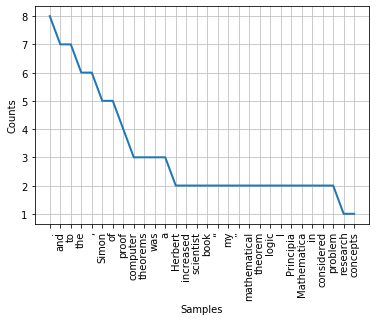

In [23]:

tokens = sum([word_tokenize(sentence) for sentence in sentences], [])

words_frequency = FreqDist(tokens)

words_frequency.plot(30, cumulative = False)

In [42]:
#https://medium.com/analytics-vidhya/implementing-the-tf-idf-search-engine-5e9a42b1d30b

   
corpus = nltk.sent_tokenize(paragraph)    


for i in range(len(corpus )):
    corpus [i] = corpus [i].lower()
    corpus [i] = re.sub(r'\W',' ',corpus [i])
    corpus [i] = re.sub(r'\s+',' ',corpus [i])

#print(corpus)

wordfreq = {}
for sentence in corpus:
    tokens = nltk.word_tokenize(sentence)
    for token in tokens:
        if token not in wordfreq.keys():
            wordfreq[token] = 1
        else:
            wordfreq[token] += 1

#print(wordfreq)

most_freq = heapq.nlargest(200, wordfreq, key=wordfreq.get)

sentence_vectors = []
for sentence in corpus:
    sentence_tokens = nltk.word_tokenize(sentence)
    sent_vec = []
    for token in most_freq:
        if token in sentence_tokens:
            sent_vec.append(1)
        else:
            sent_vec.append(0)
    sentence_vectors.append(sent_vec)

sentence_vectors = np.asarray(sentence_vectors)

print(sentence_vectors)

[[1 0 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
  1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 1 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 0 0 1 1 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 